# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/24-1 ESAA/movies_train.csv")

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/movies_train.csv")

In [ ]:
# 데이터 불러오기
train=pd.read_csv('/content/drive/MyDrive/ESAA_dataset/movies_train.csv')

In [ ]:
# 데이터 불러오기 - 희원
train=pd.read_csv('/content/drive/MyDrive/esaa/movies_train.csv')

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [ ]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

# **[영화 흥행 요인 분석]**

### **1. 내적요인**

### **1.1 감독의 특성(평균 관객수 & 제작 영화 수)과 관객수**

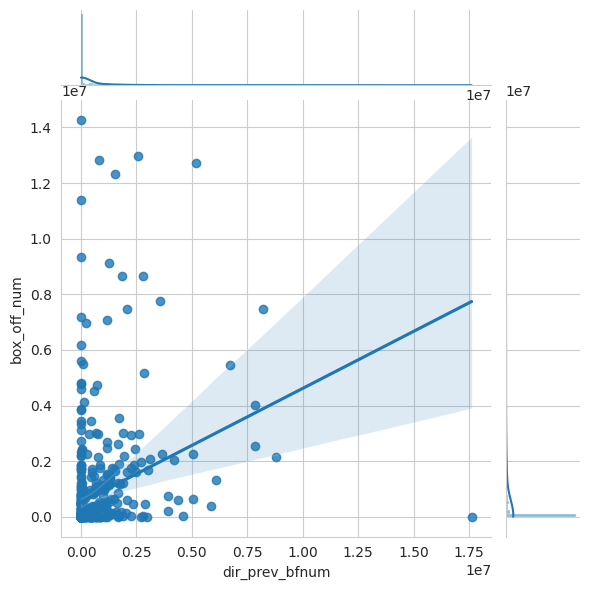

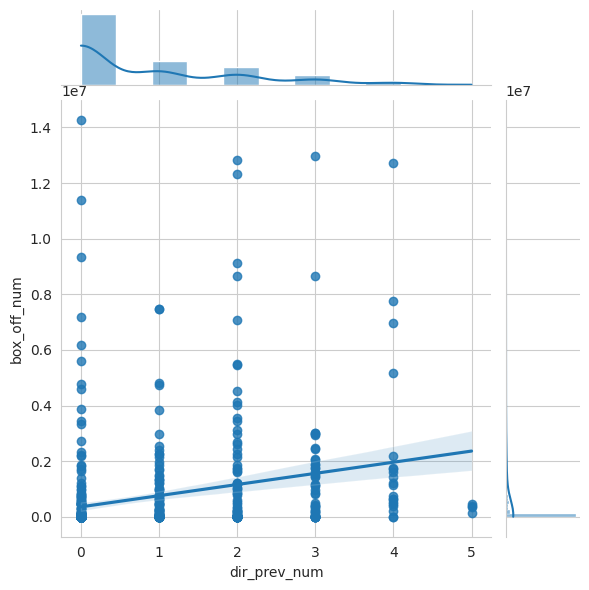

In [ ]:
sns.set_style('whitegrid')

# 조인트 그래프 - 회귀선
j1 = sns.jointplot(x='dir_prev_bfnum', y='box_off_num', kind='reg', data=train, ax=ax1)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='dir_prev_num', y='box_off_num', kind='reg', data=train, ax=ax2)

plt.show()



*   감독의 평균 관객수(dir_prev_bfnum)와 감독의 영화 개수(dir_prev_num)을 각각 다른 플롯의 x 축 변수로 두고, y축 변수로는 모두 관객수(box_off_num)을 두었다.
*   같은 y축 변수에 대해 서로 다른 x축 변수가 상관관계에 있어 어떤 차이를 보이는지 알아볼 수 있다.
*   산점도 플롯에 회귀선을 더하여 변수간 상관관계를 보다 직관적으로 확인할 수 있다.

<br>

**[결과 해석]**

*   산점도를 보았을 때 변수들 간의 특별한 상관관계를 파악하기 어렵다.
*   회귀선은 감독의 평균 관객수와 감독의 영화 개수 모두 흥행 정도 (관객수)와 양의 상관관계를 가짐을 나타낸다.
*   회귀선의 기울기만을 비교해 보았을 때 감독의 평균 관객수가 감독의 영화 개수에 비하여 흥행 정도와 더 강한 양의 상관관계를 가진다고 볼 수 있다. 하지만 '관객수'와 '영화 개수'라는 단위의 차이가 있기 때문에 보다 정확한 해석을 위해서는 추가적인 정보와 분석이 필요하다.
*   첫 번째 플롯의 경우, dir_prev_bfnum > 1.00 의 범위에 대하여도 회귀선이 그려있지만, 해당 범위에서는 데이터 값이 존재하지 않아 실제로 해당 범위에서의 회귀선이 유의미한지 알기 어렵다.





### **1.2 상영 시간과 관객수**

#### **1.2.1 상영시간에 따른 관객수 차이**

In [ ]:
# 상영시간에 따른 평균 관객수 구하고 오름차순 정렬
time_boxnum = train[['time','box_off_num']].groupby('time').mean()
time_boxnum.sort_values('box_off_num')

,box_off_num
time,
66,65.0
63,79.0
71,114.0
61,129.5
60,328.0
...,...
135,5497366.2
139,5956025.0
131,7089153.0


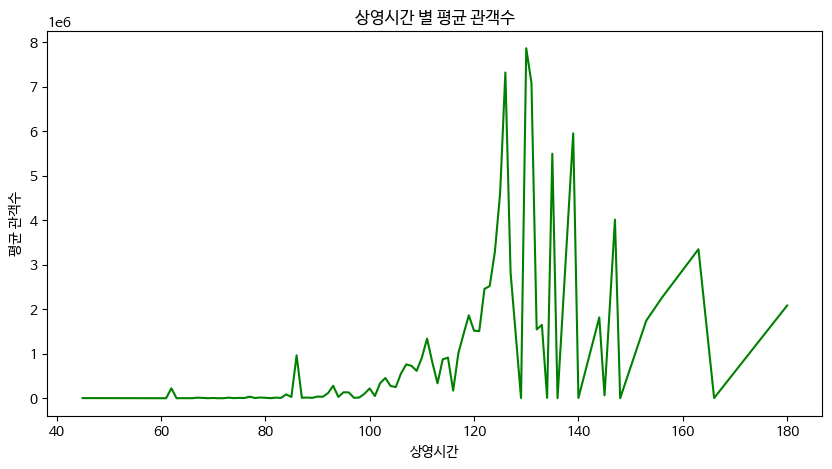

In [ ]:
# 선 그래프로 시각화
plt.figure(figsize=(10,5))
plt.plot(time_boxnum.index, time_boxnum.values, color='green')
plt.title('상영시간 별 평균 관객수')
plt.xlabel('상영시간')
plt.ylabel('평균 관객수')

plt.show()

**[결과 해석]**
- x축은 상영시간, y축은 평균 관객수로 하여 선 그래프를 그렸다.
- 너무 짧거나 긴 상영시간에 비해 120~140분 사이의 영화의 평균 관객수가 높음을 확인할 수 있다.

#### **1.2.2 장르별 러닝 타임에 따른 관객수**

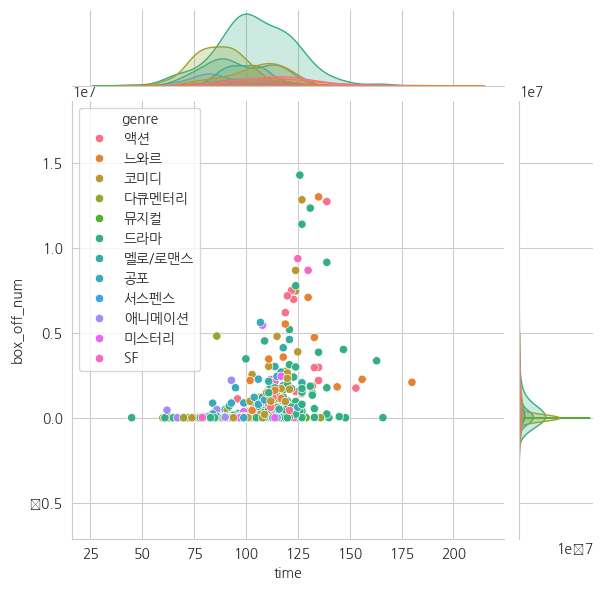

In [ ]:
sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'NanumGothic' # seaborn 한글 깨짐 방지

# 조인트 그래프 - 산점도
j1 = sns.jointplot(x='time', y='box_off_num', hue='genre', data=train)

plt.show()



*   러닝타임 변수인 time을 x축에, 관객수 변수인 box_off_num을 y축에 두어 두 변수 간의 상관관계를 나타내었다.
*   추가적으로 genre별로 다른 색을 배정하여 genre라는 변수가 러닝 타임과 관객수 간의 상관관계에 어떤 영향을 미치는지 보였다.

<br>

**[결과 해석]**
*   러닝타임 변수인 time의 최빈값 및 평균값은 약 100이며, 관객수가 많은 (0.5를 넘는) 영화들은 대부분 time 변수가 평균값인 100보다 큰 125에 가까운 값을 갖는다.
*   또한 장르별로 time 분포에 차이를 보이고 있다.



### **1.3 상영등급과 관객수**

In [ ]:
# 상영 등급별 평균 관객수 계산
screening_rat_boxnum = train[['screening_rat','box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num', ascending=False)
print(screening_rat_boxnum)

               box_off_num
screening_rat             
15세 관람가          1247518.6
12세 관람가           844980.9
청소년 관람불가          364181.3
전체 관람가            135100.5


<Figure size 2000x500 with 0 Axes>

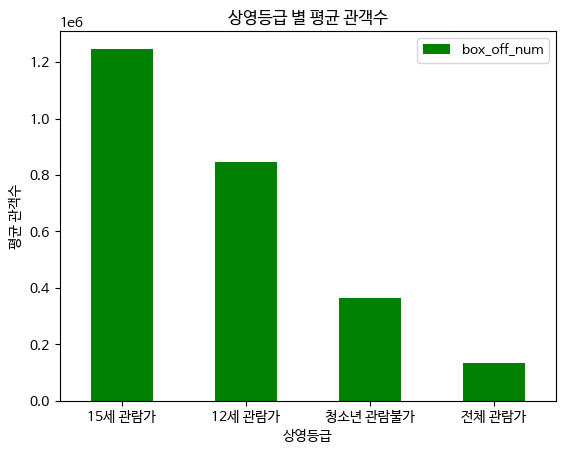

In [ ]:
# 막대 그래프로 시각화
plt.figure(figsize=(20,5))
screening_rat_boxnum.plot(kind='bar',color='green')
plt.title('상영등급 별 평균 관객수')
plt.xlabel('상영등급')
plt.ylabel('평균 관객수')
plt.xticks(rotation=0)

plt.show()

**[결과 해석]**
- x축은 상영등급, y축은 평균 관객수로 하여 막대 그래프를 그렸다.
- 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 평균 관객수가 많음을 알 수 있다.

### **1.4 장르별 관객수와 개봉수**

In [ ]:
#장르별 평균 관객수
box_gen_mean = train.groupby('genre')['box_off_num'].mean()
box_gen_mean = box_gen_mean[genre_release.index]
box_gen_mean

드라마       625689.8
다큐멘터리      67172.3
멜로/로맨스    425968.0
코미디      1193914.0
공포        590832.5
액션       2203974.1
느와르      2263695.1
애니메이션     181926.7
미스터리      527548.2
SF       1788345.7
뮤지컬         6627.0
서스펜스       82611.0
Name: box_off_num, dtype: float64

In [ ]:
#장르별 개봉수
genre_release = train['genre'].value_counts()
genre_release

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

Text(0.5, 1.0, '장르별 평균 관객수')

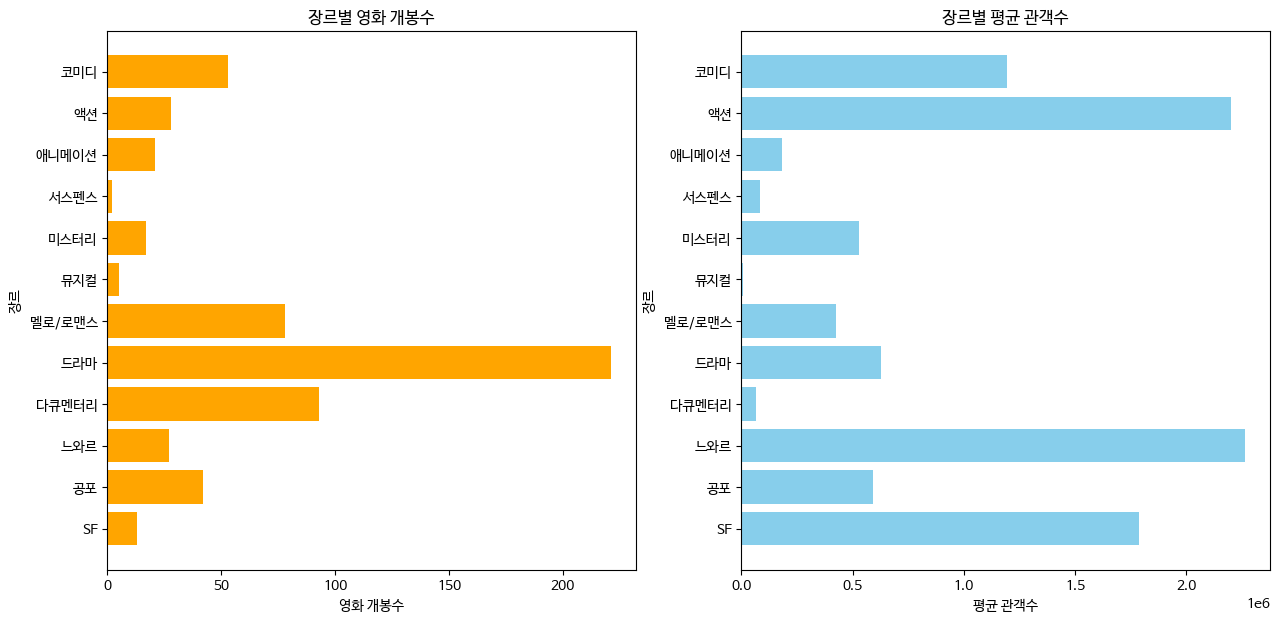

In [ ]:
fig = plt.figure(figsize=(15,7))
# 장르별 개봉수 막대그래프
ax1 = fig.add_subplot(1,2,1)
ax1.barh(genre_df.index, genre_df['cnt'], color='orange')
ax1.set_ylabel('장르')
ax1.set_xlabel('영화 개봉수')
ax1.set_title('장르별 영화 개봉수')

# 장르별 평균 관객수 막대그래프
ax2 = fig.add_subplot(1,2,2)
ax2.barh(genre_df.index, genre_df['box_off_num'], color='skyblue')
ax2.set_ylabel('장르')
ax2.set_xlabel('평균 관객수')
ax2.set_title('장르별 평균 관객수')

**[결과 해석]**
- 장르별 평균 관객수와 개봉수 순위가 서로 다르게 나타난다.
- 느와르, 액션, SF, 코미디 순으로 **관객수**가 많고
- 드라마, 다큐멘터리, 멜로/로맨스 순으로 **개봉수**가 많다.
- 평균 관객수가 높은 ‘**느와르’, ‘액션’, ‘SF’** 장르들이 개봉수는 낮은 편에 속하며,
  
  평균 관객수가 높지 않은 ‘**드라마’, ‘다큐멘터리’,’멜로/로맨스’** 장르의 개봉수가 많다.

Text(8.5, 83, '(두 변수의 단위 통일을 위한 스케일 조정)')

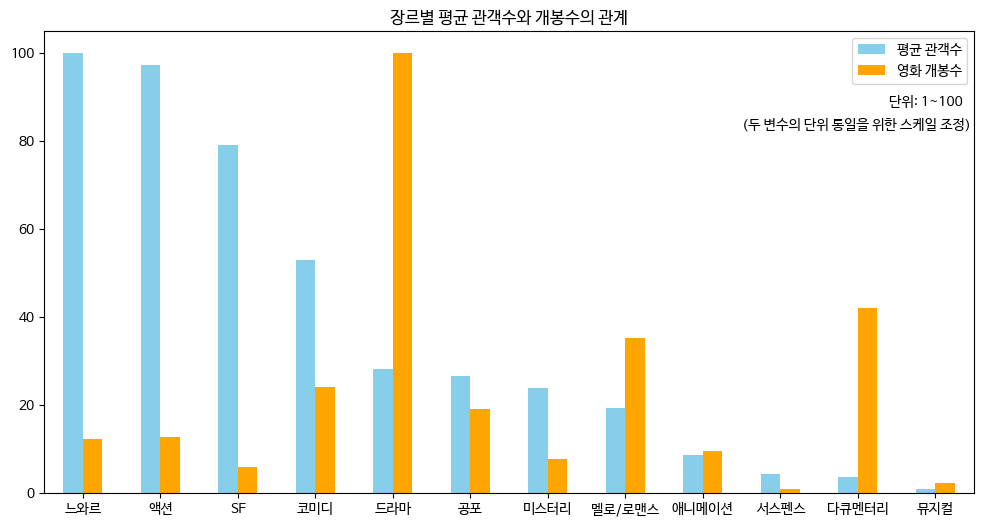

In [ ]:
#장르별 평균 관객수와 개봉수의 관계
from sklearn.preprocessing import MinMaxScaler

genre_df = genre_df.sort_values(by='box_off_num', ascending=False)
# 스케일링(1~100)
scaler = MinMaxScaler(feature_range=(1,100))
scaler.fit(genre_df)
genre_scaled = scaler.transform(genre_df)
genre_df_scaled = pd.DataFrame(data=genre_scaled, columns=['평균 관객수', '영화 개봉수', '평균 스탭수', '관객수 > 개봉수'], index=genre_df.index)
genre_df_scaled['hit'] = (genre_df_scaled['평균 관객수'].rank(ascending=False)<genre_df_scaled['영화 개봉수'].rank(ascending=False))

# 그래프 그리기
genre_df_scaled[['평균 관객수', '영화 개봉수']].plot(kind='bar', color=['skyblue','orange'], figsize=(12,6)).set_title('장르별 평균 관객수와 개봉수의 관계')
plt.xticks(rotation=0)
plt.annotate('단위: 1~100', xy=(10.4, 88))
plt.annotate('(두 변수의 단위 통일을 위한 스케일 조정)', xy=(8.5, 83))

**[결과 해석]**
- 장르가 드라마인 영화가 압도적으로 많이 개봉하며 그 뒤로는 다큐멘터리, 멜로/로맨스 장르가 가장 많이 개봉한다.
- 흥행의 척도인 관객수는 액션과 느와르. SF가 가장 높으며, 드라마는 개봉 수에 비해 관객 수가 낮다.

Text(0.5, 0.98, 'top50 vs low50 장르별 개봉수')

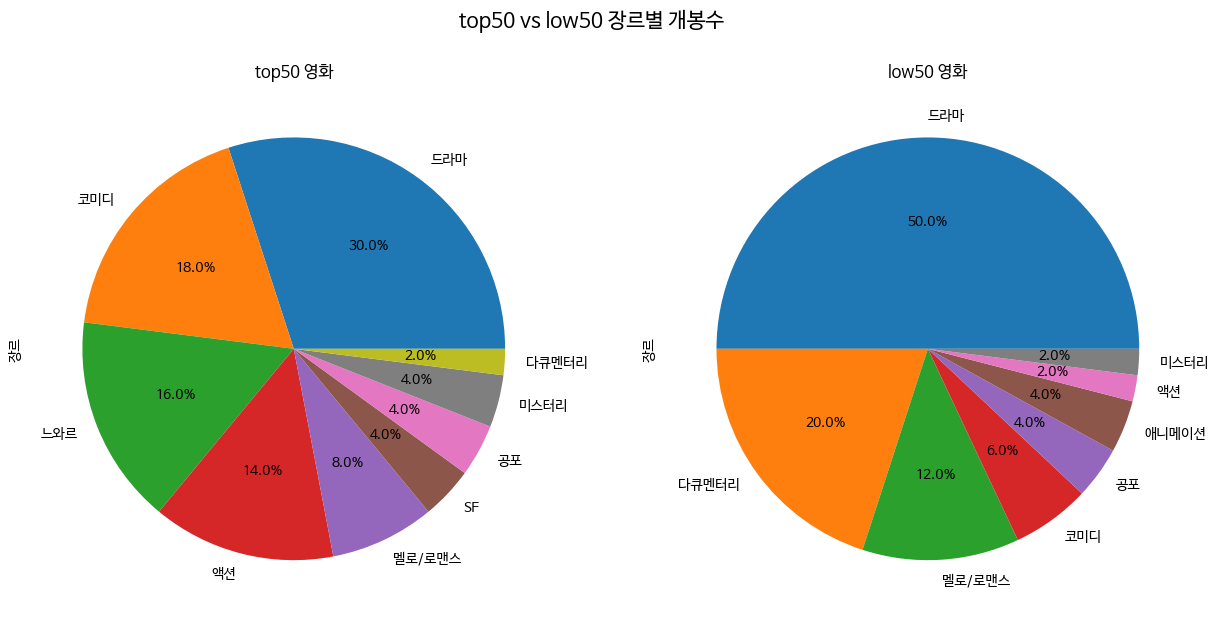

In [ ]:
# 관객수 기준 top50 영화와 low50 영화의 장르별 개봉수

# top 50개 영화 저장
top50 = train.sort_values('box_off_num', ascending=False).head(50)

# low 50개 영화 저장
low50 = train.sort_values('box_off_num', ascending=False).tail(50)

# 그래프 그리기
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# top50 영화의 장르별 개봉수
top50['genre'].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax1)
ax1.set_title('top50 영화')
ax1.set_ylabel('장르')

# low50 영화의 장르별 개봉수
low50['genre'].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax2)
ax2.set_title('low50 영화')
ax2.set_ylabel('장르')
fig.suptitle('top50 vs low50 장르별 개봉수', fontsize=15)

**[결과 해석]**
- top50, low50 둘 다 가장 많이 개봉된 장르는 ‘드라마’이다.
- 평균 관객수가 높지 않았던 것에 비해 top50의 30%를 차지한 것과 top/low에서 모두 1등을 차지한 것으로 보아, 드라마 장르는 흥행 편차가 심하다고 추측할 수 있다.
- 느와르, 액션 장르는 top50에서 각각 15% 정도를 차지하고 있고, low50에는 속해있지 않다. 따라서 어느정도 흥행이 보장되는 장르라고 볼 수 있다.

### **2. 외적 요인**

### **2.1 개봉 시기와 관객수 (계절별 관객수)**

In [ ]:
#계절별 데이터
spring = train[(train['release_time'].dt.month==3) | (train['release_time'].dt.month==4) | (train['release_time'].dt.month==5)]
summer = train[(train['release_time'].dt.month==6) | (train['release_time'].dt.month==7) | (train['release_time'].dt.month==8)]
fall = train[(train['release_time'].dt.month==9) | (train['release_time'].dt.month==10) | (train['release_time'].dt.month==11)]
winter = train[(train['release_time'].dt.month==12) | (train['release_time'].dt.month==1) | (train['release_time'].dt.month==2)]

In [ ]:
spring.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868
12,해로,(주)키노아이,드라마,2012-03-22,113,12세 관람가,최종태,431231.0,1,14,2,5851
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.0,1,572,11,7453715
17,별이 빛나는 밤,CGV 무비꼴라쥬,드라마,2012-04-05,98,전체 관람가,린슈유,773.0,1,8,4,5693


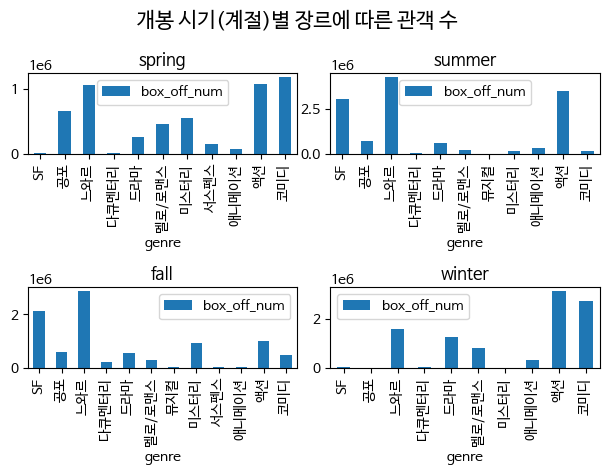

In [ ]:
fig, axs = plt.subplots(2, 2)
spring[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0,0])
axs[0, 0].set_title('spring')
summer[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0,1])
axs[0, 1].set_title('summer')
fall[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1,0])
axs[1, 0].set_title('fall')
winter[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1,1])
axs[1, 1].set_title('winter')
plt.suptitle(' 개봉 시기(계절)별 장르에 따른 관객 수', fontsize=15)
plt.tight_layout()
plt.show()

- train['release_time'].dt.month== 를 이용해 계절별 데이터를 추출
- 계절별로 3개월 씩 배정 (봄: 3-5월 / 여름: 6-8월 / 가을: 9-11월 / 겨울 : 12-2월)
- 봄, 여름, 가을, 겨울 4분할로 만들어서 막대 그래프 그리기: fig, axs = plt.subplots(2, 2)
- 계절별 데이터를 groupby 함수로 genre 별로 그룹화한 뒤, 평균 관객수를 y축에 배치해 막대 그래프로 시각화

<br>

**[결과 해석]**

*계절별로 관객수가 많은 장르
- 봄: 코미디, 액션, 느와르
- 여름: 느와르, 액션, SF
- 가을: 느와르, SF
- 겨울: 액션, 코미디, 느와르




### **2.2 배급사와 관객수**

#### **2.2.1 배급사별 평균 관객수 상위 30개**

In [ ]:
box_off_mean=train.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False).head(30)
box_off_mean

distributor
CJ E&M Pictures   4122337.0
(주)쇼박스            3386656.3
(주)아이필름코퍼레이션      3117859.0
쇼박스(주)미디어플렉스      2634823.0
영구아트무비            2541603.0
CJ E&M 영화부문       2505309.3
(주)NEW            2184404.8
CJ 엔터테인먼트         2162742.5
이십세기폭스코리아(주)      1637046.0
SK텔레콤(주)          1383867.0
CGV아트하우스          1318188.6
롯데엔터테인먼트          1238148.9
전망좋은영화사           1214237.0
주머니필름             1201944.0
NEW               1019016.6
싸이더스               963439.0
시네마서비스             896843.2
보람엔터테인먼트           849635.0
스튜디오 블루            771699.0
씨네그루(주)키다리이엔티      755184.0
씨너스엔터테인먼트(주)       723307.5
(주)JK필름            688639.0
CGV 아트하우스          683977.0
메가박스(주)플러스엠        525330.5
OAL(올)             497994.0
인벤트 디              474426.9
싸이더스 FNH           472009.0
시너지                456663.6
필라멘트 픽쳐스           450269.2
판씨네마(주)            346483.0
Name: box_off_num, dtype: float64

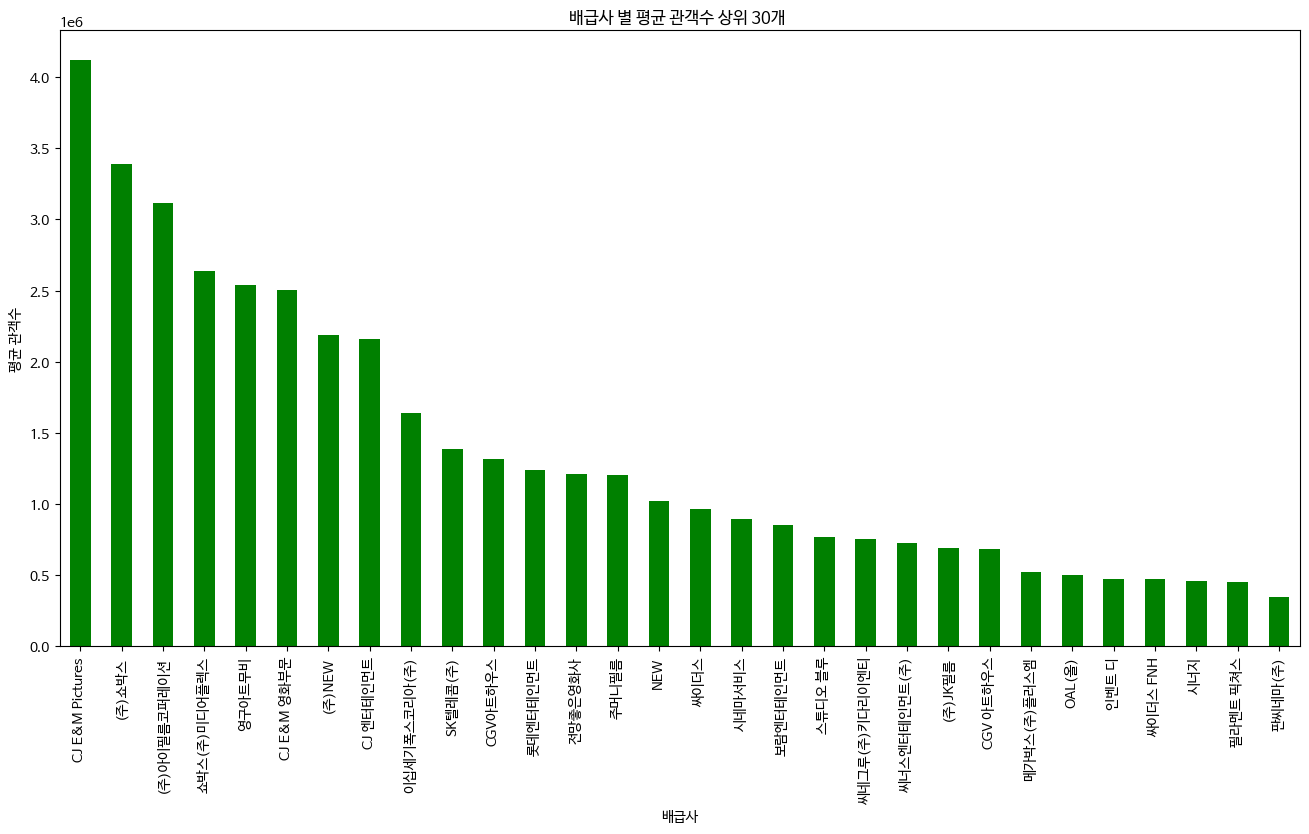

In [ ]:
#막대그래프로 시각화
plt.figure(figsize=(16, 8))
box_off_mean.plot(kind='bar', color='green')
plt.title('배급사 별 평균 관객수 상위 30개 ')
plt.xlabel('배급사')
plt.ylabel('평균 관객수')
plt.xticks(rotation=90) #X축 글자 방향 90도 돌리기
plt.show()

- groupby 함수를 이용해 distributor(배급사)로 그룹화한뒤, ['box_off_num'].mean() 을 통해 배급사별 평균 관객수를 계산한 뒤 내림차순으로 30개를 정렬함.
- x축엔 배급사, y축에는 평균 관객수로 지정해 막대그래프로 시각화

<br>

**[결과 해석]**
- CJ E&M이 가장 많은 관객수를 기록하고 있으며, 뒤로 쇼박스, (주)아이필름코퍼레이션 등이 잇고 있다.

#### **2.2.2 제작 영화수 기준 top10 배급사의 평균 관객수**

In [ ]:
# 영화를 가장 많이 제작하는 배급사 top10 구하기
top_distributor = train['distributor'].value_counts().sort_values(ascending=False)[:10]
print(top_distributor)

# 배급사 top10의 평균 관객수 계산
top10_boxnum_mean = []

for index in top_distributor.index:
  a = train[train['distributor']==index]['box_off_num'].mean()
  top10_boxnum_mean.append(a)

top10_boxnum_mean.sort(reverse=True)
print('\n배급사 별 평균 관객수:',top10_boxnum_mean)

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

배급사 별 평균 관객수: [3386656.3076923075, 2184404.8333333335, 2162742.462962963, 1238148.9423076923, 32342.206896551725, 9600.9, 6771.8, 5210.576923076923, 4373.2, 1027.2857142857142]


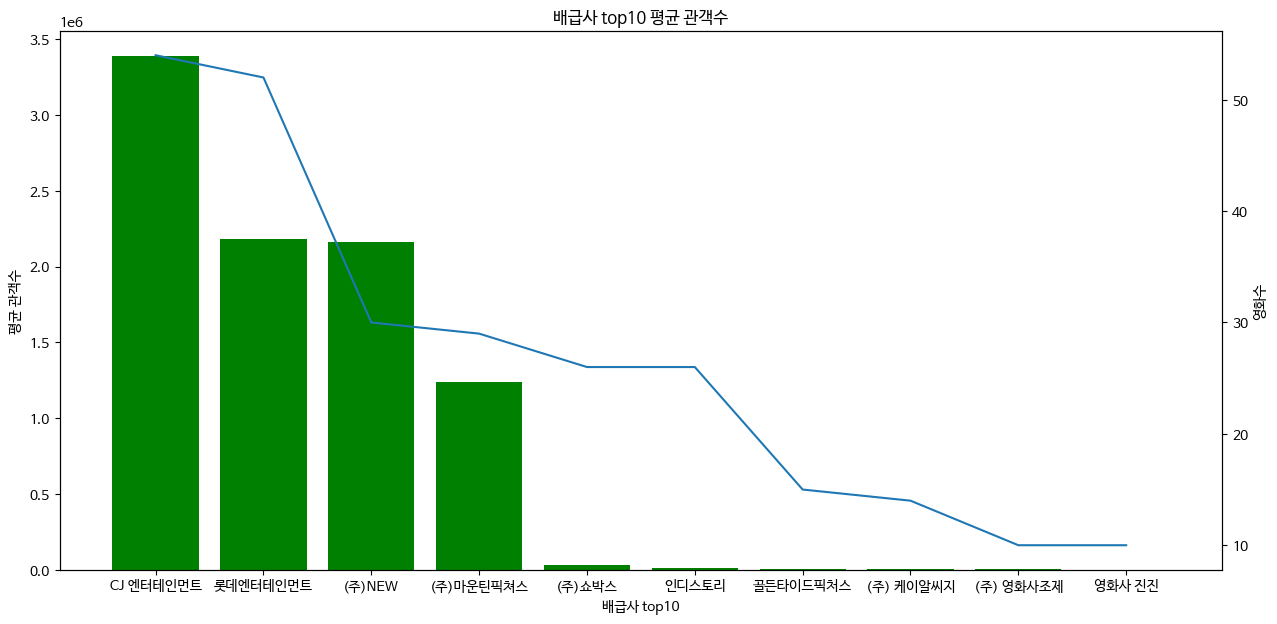

In [ ]:
# 그래프로 시각화

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot()

ax1.bar(top_distributor.index, top10_boxnum_mean, color='green')
ax1.set_xlabel('배급사 top10')
ax1.set_ylabel('평균 관객수')

ax2 = ax1.twinx()
ax2.plot(top_distributor.index, top_distributor.values)
ax2.tick_params(axis='y')
ax2.set_ylabel('영화수')

plt.title('배급사 top10 평균 관객수')
plt.show()

**[결과 해석]**
- x축은 영화 제작 수가 많은 배급사 top10, 막대 그래프의 y축은 평균 관객수, 선 그래프의 y축은 영화수로 하여 그래프를 그렸다.
- 영화를 많이 제작한 배급사일수록 평균관객수도 높음을 확인할 수 있다.

#### **2.2.3 Big4 배급사의 연도별 관객 점유율**

- **Big4 배급사**: CJ, 쇼박스, 롯데, NEW (이름은 다르지만 같은 회사 배급사들까지 합산)

In [ ]:
# big4 배급사 여부 칼럼 추가
big4_dis = ['CGV아트하우스', 'CJ E&M Pictures', 'CJ E&M 영화부문', 'CJ 엔터테인먼트',
        '롯데엔터테인먼트',
        '(주)NEW', 'NEW',
        '(주)쇼박스', '쇼박스(주)미디어플렉스']
train_big = train.copy()
train_big['big4_dis'] = train['distributor'].isin(big4_dis)
train_big['release_year'] = train_big['release_time'].dt.year

# big4가 제작한 영화 데이터프레임
CJ = ['CGV아트하우스', 'CJ E&M Pictures', 'CJ E&M 영화부문', 'CJ 엔터테인먼트']
Lotte = ['롯데엔터테인먼트']
New = ['(주)NEW', 'NEW']
Box = ['(주)쇼박스', '쇼박스(주)미디어플렉스']

def dis_category(dis):
  cat = ''
  if dis in CJ: cat = 'CJ'
  elif dis in Lotte: cat = '롯데'
  elif dis in New: cat = 'NEW'
  elif dis in Box: cat = '쇼박스'
  return cat

big4_movies = train[train['distributor'].isin(big4_dis)]
big4_movies['dis_cat'] = big4_movies['distributor'].apply(lambda x: dis_category(x))
big4_movies['release_year'] = big4_movies['release_time'].dt.year

# Big4 데이터프레임
year_sum = train_big.groupby('release_year')['box_off_num'].sum()
dis_list = ['CJ', 'NEW', '쇼박스', '롯데']
year_df = pd.DataFrame(columns=['release_year', 'box_off_num', 'distributor'])
for i in dis_list:
  df = big4_movies[big4_movies['dis_cat']==i].groupby('release_year')['box_off_num'].sum() / year_sum
  df = df.to_frame().reset_index()
  df['distributor'] = i
  year_df = pd.concat([year_df, df]).reset_index(drop=True)

Text(0, 0.5, '관객 점유율')

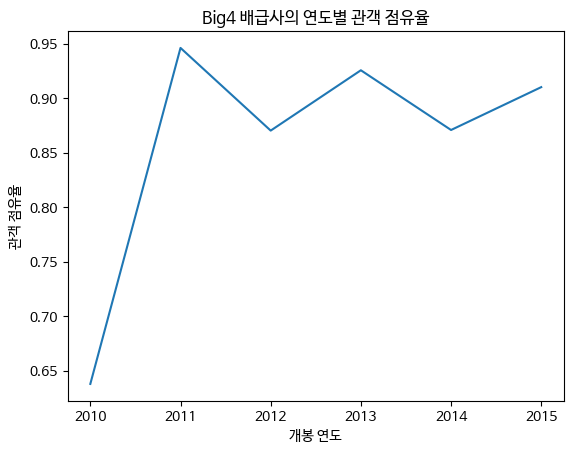

In [ ]:
year_df.groupby('release_year')['box_off_num'].sum().plot()
plt.title('Big4 배급사의 연도별 관객 점유율')
plt.xlabel('개봉 연도')
plt.ylabel('관객 점유율')

**[결과 해석]**
- Big4 배급사 제작 영화의 관객 점유율이 2011년 이후 전체의 약 90% 이상으로 대부분을 차지하고 있다.
  - 주요 배급사들의 독점이 심한 것으로 보인다.

Text(0.5, 0.98, 'Big4 배급사 순위')

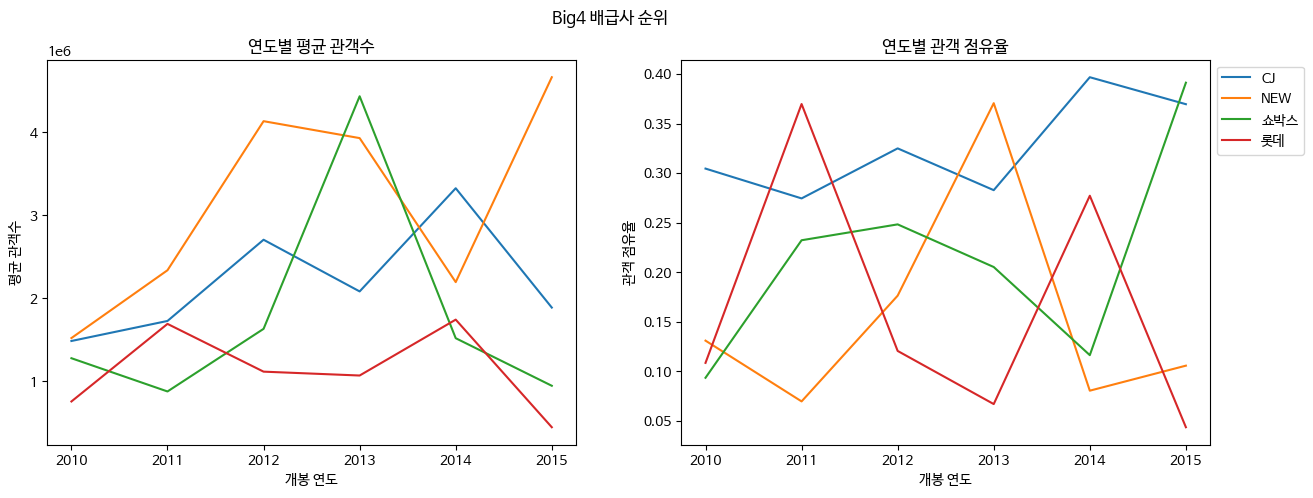

In [ ]:
# 연도별 평균 관객수, 개봉 영화수
dis_year_mean = big4_movies.groupby(['release_year','dis_cat'])['box_off_num'].mean().to_frame().reset_index()
dis_year_cnt = big4_movies.groupby(['release_year'])['dis_cat'].value_counts().to_frame().rename(columns={'dis_cat':'cnt'}).reset_index()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.lineplot(x='release_year', y='box_off_num', hue='dis_cat', hue_order=['CJ','쇼박스', 'NEW', '롯데'], legend=False, data=dis_year_mean, ax=ax[0]).set_title('연도별 평균 관객수')
ax[0].set_xlabel('개봉 연도')
ax[0].set_ylabel('평균 관객수')
sns.lineplot(data=year_df, x='release_year', y='box_off_num', hue='distributor', ax=ax[1]).set_title('연도별 관객 점유율')
ax[1].set_xlabel('개봉 연도')
ax[1].set_ylabel('관객 점유율')
plt.legend(bbox_to_anchor=(1,1))
fig.suptitle('Big4 배급사 순위')

**[결과 해석]**
- 평균 관객수와 관객 점유율 순위가 일치하지는 않는다.
- **CJ**는 두 지표 모두 상승세를 보이고, 특히 관객 점유율에서 5년 내내 상위권에 위치하며 강세를 보인다.
- **쇼박스**는 평균 관객수가 많은 편은 아니지만, 관객 점유율에서 다소 상승세를 보인다.
- **NEW**는 2013년을 제외하고 관객 점유율은 낮은 편이지만, 평균 관객수는 2014년을 제외하고 항상 상위권을 차지했다.
- **롯데**는 평균 관객수가 가장 낮은 편이며, 관객 점유율은 변동이 큰 편이다.

# **[추가 분석]**

### **1. 배급사별 장르 & 개봉수**

#### **1.1 배급사에 따른 장르별 개봉수 - 전체 추이 파악**

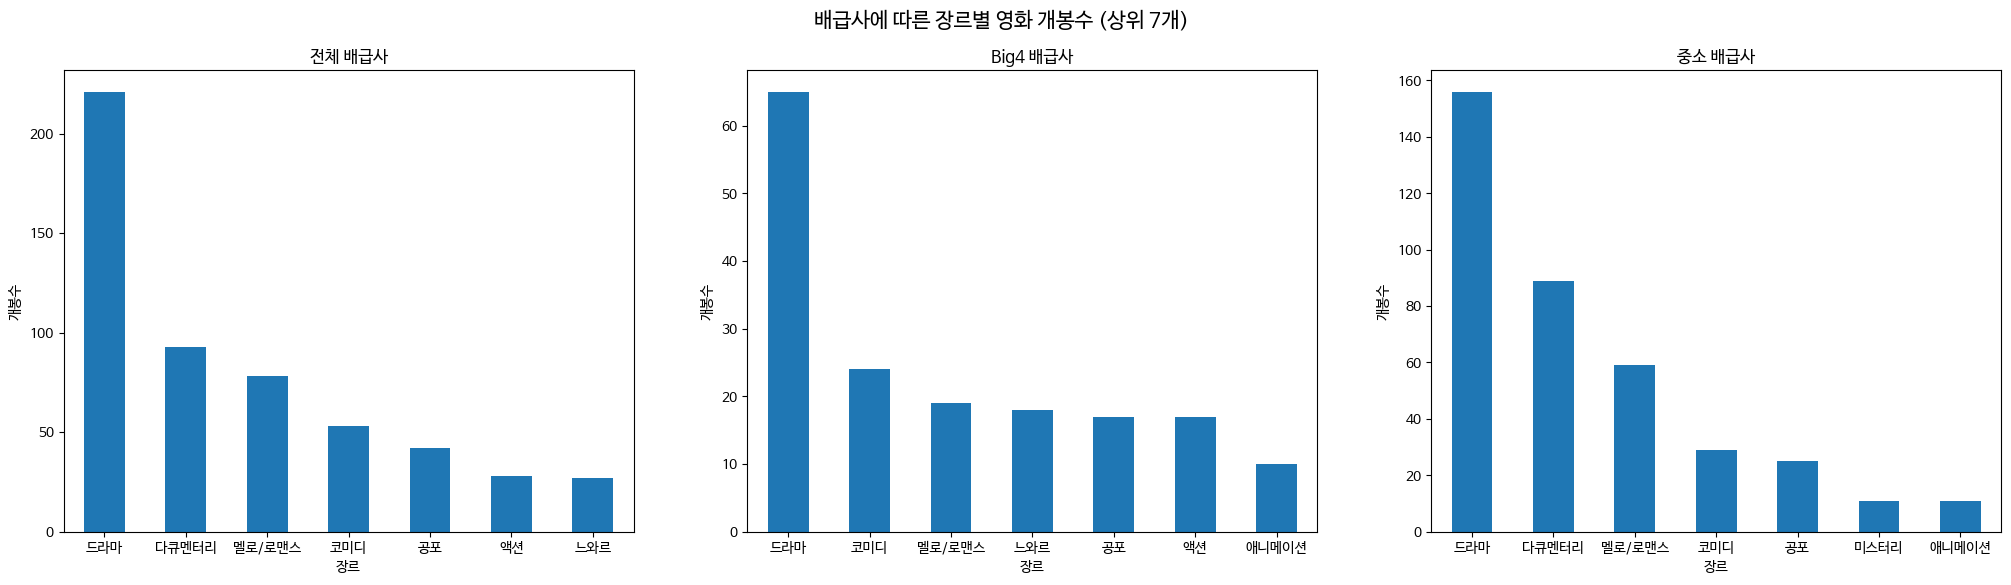

In [ ]:
# 그래프 그리기
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
fig.suptitle('배급사에 따른 장르별 영화 개봉수 (상위 7개)', fontsize=15)

# 전체 영화의 장르별 개봉수
train.value_counts('genre').head(7).plot(kind='bar', ax=ax1)
ax1.set_title('전체 배급사')
ax1.set_xlabel('장르')
ax1.set_ylabel('개봉수')
ax1.tick_params(rotation=0)

# big4의 장르별 개봉수
big4_movies.value_counts('genre').head(7).plot(kind='bar', ax=ax2)
ax2.set_title('Big4 배급사')
ax2.set_xlabel('장르')
ax2.set_ylabel('개봉수')
ax2.tick_params(rotation=0)

# 그외 배급사의 장르별 개봉수
train_big[train_big['big4_dis']==False].value_counts('genre').head(7).plot(kind='bar', ax=ax3)
ax3.set_title('중소 배급사')
ax3.set_xlabel('장르')
ax3.set_ylabel('개봉수')
ax3.tick_params(rotation=0)

**[결과 해석]**

- 모든 그래프에서 ‘드라마’ 장르가 가장 높게 나타났다.
- Big4 여부의 영향이 가장 큰 것은 ‘다큐멘터리’ 장르다. Big4 배급사에서는 ‘다큐멘터리’ 장르가 상위권에 없는 반면 그외 배급사에서는 2위를 차지했다.
- Big4에서는 ‘느와르’ 장르가 4위지만 그외 배급사에서는 상위권에 속하지 않았다.
- 두 그래프에서 나타난 다큐멘터리와 느와르 장르의 개봉수 차이가 스탭수와 연관이 있을 것이라고 추측해볼 수 있다.
    - Big4 영화의 스탭이 많이 필요한 영화를 더 많이 찍었을 것이다.
    - 다큐멘터리는 스탭수가 적고, 느와르는 많을 것이다.

#### **1.2 Big4 배급사의 장르별 개봉수**

Text(0.5, 1.0, '롯데')

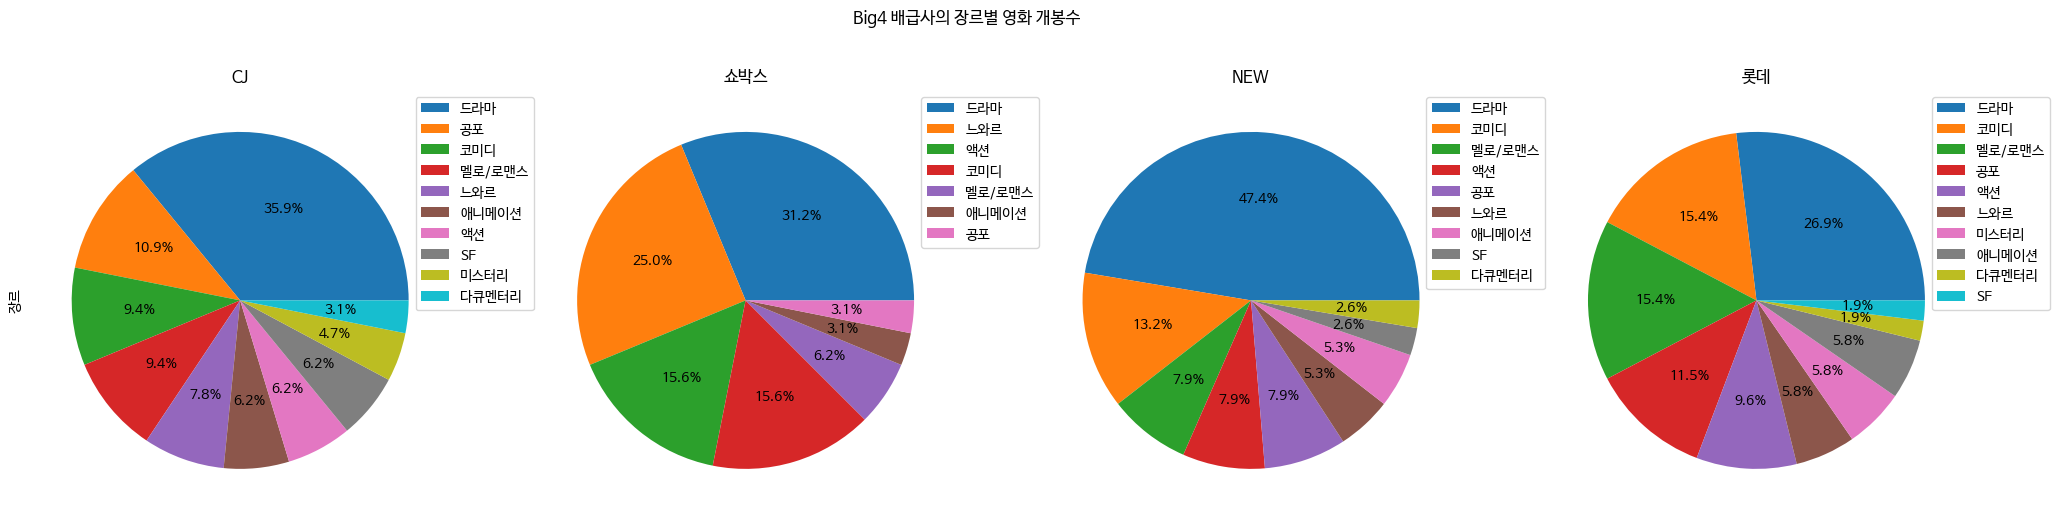

In [ ]:
fig = plt.figure(figsize=(25,6))
fig.suptitle('Big4 배급사의 장르별 영화 개봉수')

# 장르별 개봉수 막대그래프
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.pie(big4_movies[big4_movies['dis_cat']=='CJ']['genre'].value_counts(), autopct='%.1f%%')
ax1.legend(big4_movies[big4_movies['dis_cat']=='CJ']['genre'].value_counts().index, bbox_to_anchor=(0.9,1))
ax1.set_title('CJ')
ax1.set_ylabel('장르')

ax2.pie(big4_movies[big4_movies['dis_cat']=='쇼박스']['genre'].value_counts(), autopct='%.1f%%')
ax2.legend(big4_movies[big4_movies['dis_cat']=='쇼박스']['genre'].value_counts().index, bbox_to_anchor=(0.9,1))
ax2.set_title('쇼박스')

ax3.pie(big4_movies[big4_movies['dis_cat']=='NEW']['genre'].value_counts(), autopct='%.1f%%')
ax3.legend(big4_movies[big4_movies['dis_cat']=='NEW']['genre'].value_counts().index, bbox_to_anchor=(0.9,1))
ax3.set_title('NEW')

ax4.pie(big4_movies[big4_movies['dis_cat']=='롯데']['genre'].value_counts(), autopct='%.1f%%')
ax4.legend(big4_movies[big4_movies['dis_cat']=='롯데']['genre'].value_counts().index, bbox_to_anchor=(0.9,1))
ax4.set_title('롯데')

배급한 영화수 기준 상위 5개 배급사별 영화 장르 분포를 파이차트로 출력
- 배급한 영화 수: CJent > 롯데ent > NEW > 마운틴픽처스 > 쇼박스
- 롯데엔터테인먼트의 영화 장르가 가장 다양함
- 5곳 모두 대체적으로 액션>=느와르>코미디>다큐멘터리>뮤지컬>=드라마 순서로 많은 편임
- NEW는 50% 이상으로 액션 영화의 비중이 높은 편임.
- 마운틴 픽처스와 쇼박스의 경우, 제작하는 장르의 종류가 적은만큼 느와르와 코미디 장르의 비중이 커짐


**[결과 해석]**

**각 배급사별 특징**

- **쇼박스**: 다른 배급사들에 비해 장르 가짓수도 적고, 주력 장르들의 비중이 높다. 다른 배급사와는 다르게 느와르, 액션 장르를 많이 개봉한 것이 특징적이다.
- **NEW**: 드라마의 비중이 50% 가량으로 압도적이다.
- **CJ**: 가장 다양한 장르를 고르게 개봉했다.
- **롯데**: 장르가 다양한 편이다. 코미디와 멜로/로맨스의 비중이 크다.

### **2. 장르별 스탭수**

Text(0, 0.5, '평균 스탭수')

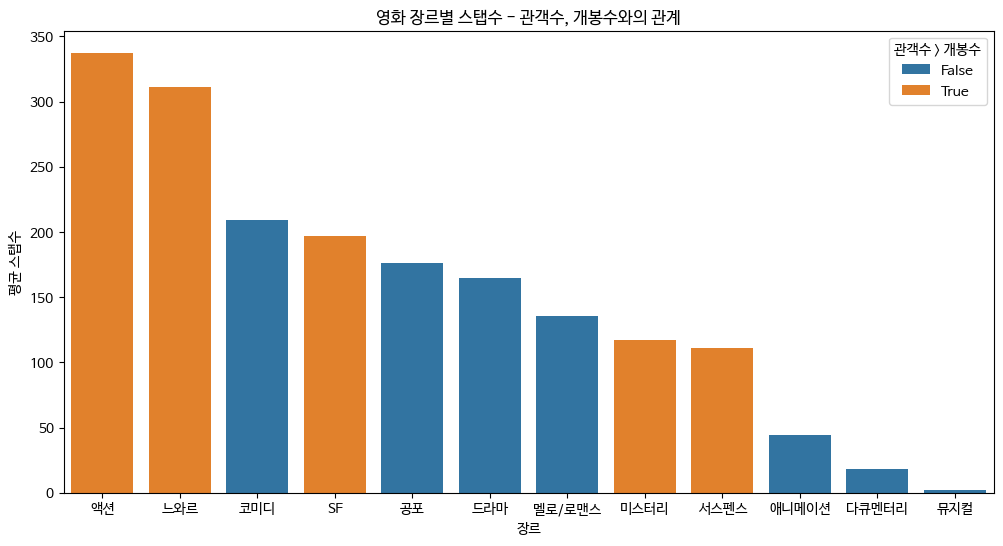

In [ ]:
# 장르별 평균 관객수, 영화 제작수, 평균 스텝수 데이터프레임
genre_df = train[['genre','box_off_num']].groupby('genre').mean()
genre_df = pd.concat([genre_df, train['genre'].value_counts().to_frame(), train[['genre','num_staff']].groupby('genre').mean()], axis=1).rename(columns={'genre':'cnt'})

genre_df['관객수 > 개봉수'] = (genre_df['box_off_num'].rank(ascending=False)<genre_df['cnt'].rank(ascending=False))

plt.figure(figsize=(12,6))
plt.title('영화 장르별 스탭수 - 관객수, 개봉수와의 관계')
sns.barplot(x=genre_df.sort_values(by='num_staff', ascending=False).index, y='num_staff', data=genre_df.sort_values(by='num_staff', ascending=False), hue='관객수 > 개봉수')
plt.xlabel('장르')
plt.ylabel('평균 스탭수')

**[결과 해석]**
- 관객수가 많지만 개봉수가 적은 액션, 느와르는 스탭수가 많고, 관객수가 적지만 개봉수가 많은 다큐멘터리, 드라마는 스탭수가 적은 편이다.

  => 평균 관객수와 개봉수 차이를 바탕으로 세운 가설에 부합한다.

### **3. 배급사별 스탭수**

([<matplotlib.axis.XTick at 0x7b74c0573ca0>,
 [Text(False, 0, '중소'), Text(True, 0, 'Big4')])

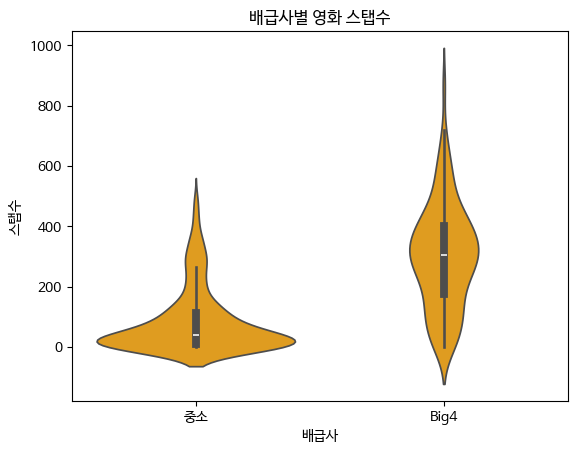

In [ ]:
sns.violinplot(data=train_big, x='big4_dis', y='num_staff', color='orange').set_title('배급사별 영화 스탭수')
plt.xlabel('배급사')
plt.ylabel('스탭수')
plt.xticks([False, True], ['중소', 'Big4'])

**[결과 해석]**
- Big4 배급사 영화들의 스탭수가 훨씬 많다.
- 중소 배급사에서 액션, 느와르 장르의 개봉수가 적은 이유가 스탭수가 많은 장르를 제작하기 어렵기 때문이라고 예상할 수 있다.
    
  => 가설에 부합한다.